In [71]:
#libraries we need
#!pip install h2o
#!pip install pydotplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
pd.options.mode.chained_assignment = None
import h2o
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from scipy.special import expit


from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

In [72]:
df = pd.read_csv('df_agriculture.csv')

In [73]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

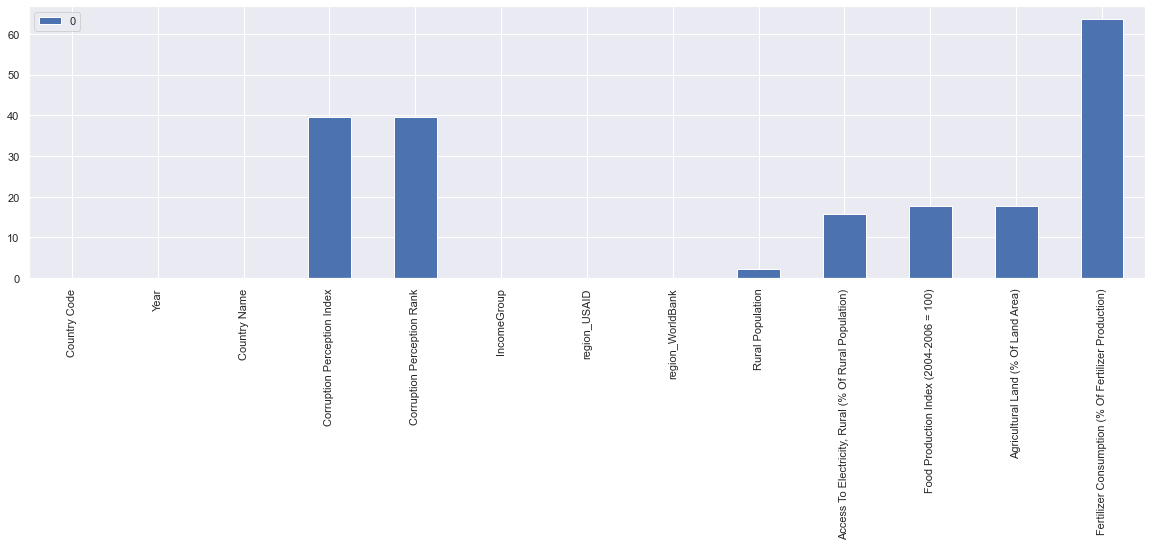

In [74]:
pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

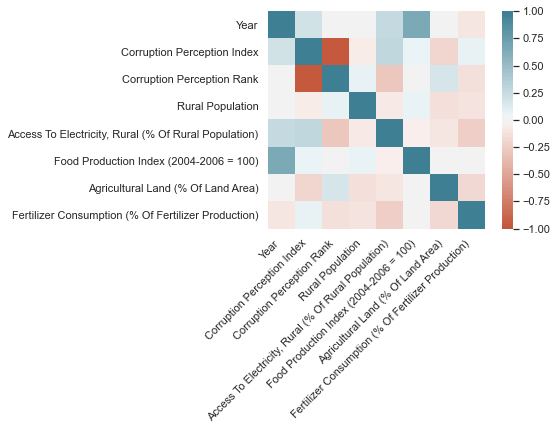

In [75]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [76]:
cor_matrix = df.corr().abs()
#print(cor_matrix)

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)

In [77]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] 
print(to_drop)

['Corruption Perception Rank']


In [82]:
df_final = df.drop(to_drop, axis=1)
df_final

,Country Code,Year,Country Name,Corruption Perception Index,IncomeGroup,region_USAID,region_WorldBank,Rural Population,"Access To Electricity, Rural (% Of Rural Population)",Food Production Index (2004-2006 = 100),Agricultural Land (% Of Land Area),Fertilizer Consumption (% Of Fertilizer Production)
0,AFG,2000,Afghanistan,NaN,Low income,South and Central Asia (SCA),South Asia,16192155.0,NaN,86.04,57.827099,NaN
1,AFG,2000,Afghanistan,NaN,Low income,South and Central Asia (SCA),South Asia,16192155.0,NaN,86.04,57.827099,NaN
2,AFG,2000,Afghanistan,NaN,Low income,South and Central Asia (SCA),South Asia,16192155.0,NaN,86.04,57.827099,NaN
3,AFG,2000,Afghanistan,NaN,Low income,South and Central Asia (SCA),South Asia,16192155.0,NaN,86.04,57.827099,NaN
4,AFG,2000,Afghanistan,NaN,Low income,South and Central Asia (SCA),South Asia,16192155.0,NaN,86.04,57.827099,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5359,ZMB,2017,Zambia,37.0,Lower middle income,Sub-Saharan Africa (SSA),Sub-Saharan Africa,9610647.0,13.997699,NaN,NaN,NaN
5360,ZMB,2018,Zambia,35.0,Lower middle income,Sub-Saharan Africa (SSA),Sub-Saharan Africa,9800136.0,10.968000,NaN,NaN,NaN
5361,ZMB,2018,Zambia,35.0,Lower middle income,Sub-Saharan Africa (SSA),Sub-Saharan Africa,9800136.0,10.968000,NaN,NaN,NaN
5362,ZMB,2019,Zambia,34.0,Lower middle income,Sub-Saharan Africa (SSA),Sub-Saharan Africa,9989317.0,NaN,NaN,NaN,NaN
